# Task2 = House Price Prediction(Linear Regression)

# 1.Download simple CSV data with features like area, bedrooms, and price

In [224]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snehasishdhar/simple-house-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\snehasishdhar\simple-house-price-prediction\versions\1


 # importing all necessary liabraries

In [227]:
import pandas as pd        # Data manipulation and analysis
import numpy as np         # Numerical operations
import seaborn as sns      # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting with Matplotlib

# Display plots inline in Jupyter Notebook
%matplotlib inline

import warnings            # Handle warning messages
warnings.filterwarnings('ignore')  # Suppress warning messages

# read the dataset

In [230]:
df = pd.read_csv(r'C:\Users\admin\Downloads\house_price.csv')

In [232]:
# top five rows
df.head()

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#  2.Clean null values and encode categorical fields if needed

# Cleaning  null (missing) values 

In [236]:
df = df.dropna()

 # Encoded categorical fields

In [239]:
# Identify object or category columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

In [241]:
df = pd.get_dummies(df, columns=cat_cols)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    47 non-null     int64
 1   rooms   47 non-null     int64
 2   price   47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


 # 3.Visualize price vs area, price vs rooms using scatter plots.

# Scatter Plot – Price vs Area

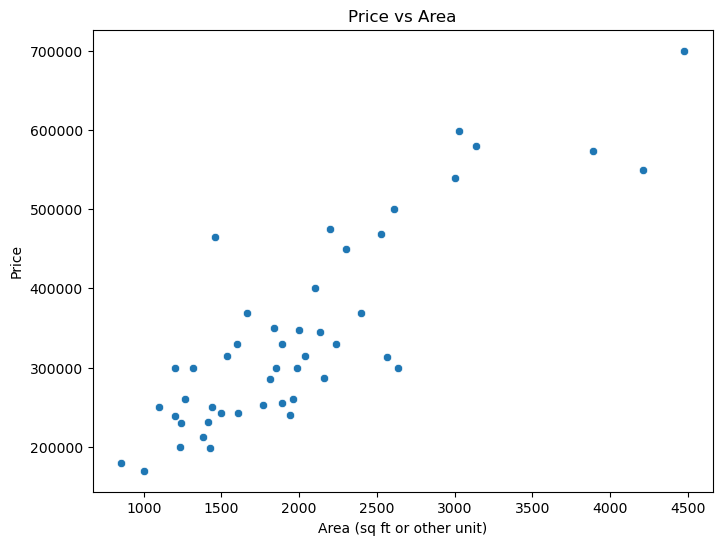

In [249]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='area', y='price')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft or other unit)')
plt.ylabel('Price')
plt.savefig('Price_vs_Area.png')
plt.show()

# Price vs Number of Rooms

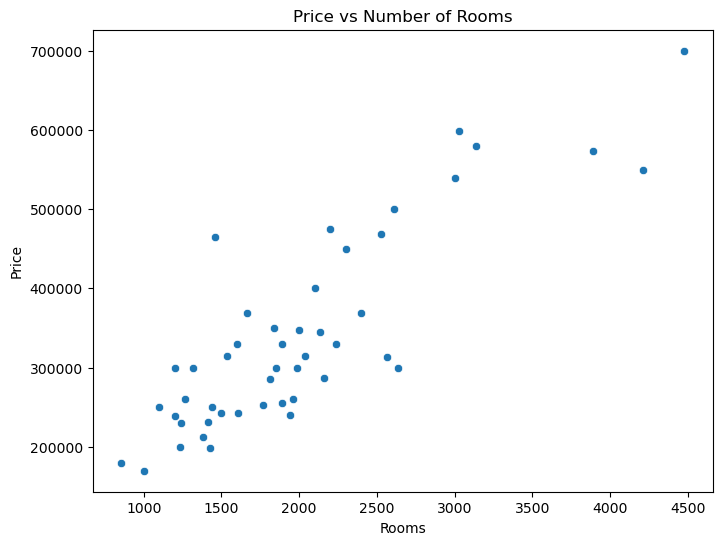

In [118]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='area', y='price')
plt.title('Price vs Number of Rooms')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.savefig('Price_vs_Room.png')
plt.show()

 # 4.Split data into train/test using train_test_split()

In [59]:
# importing the function
from sklearn.model_selection import train_test_split

<!-- Assuming my target variable is price and the rest are features -->

In [84]:
# Assuming my target variable is price and the rest are features

In [70]:
# X = features, y = target
X = df.drop('price', axis=1)
y = df['price']

# Spliting the data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% test, 80% train
    random_state=42     # for reproducibility
)

NOTE:
test_size=0.2: You can change this (e.g., 0.3 for 30% test data).
random_state: Ensures the split is the same every time you run it.
X_train, X_test: Feature sets for training and testing.
y_train, y_test: Target sets for training and testing.

In [78]:
# checking the results
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (37, 2), Test set: (10, 2)


  # 5.Train LinearRegression model 

In [81]:
# importing the model

In [86]:
from sklearn.linear_model import LinearRegression

# creating the train model

In [90]:
# Initialize the model
model = LinearRegression()

# Train (fit) the model on training data
model.fit(X_train, y_train)

LinearRegression()

# Check model coefficients 

In [94]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 84763.622522194
Coefficients: [   143.21853204 -13512.56442597]


 # 6.Predict on test data and compare real vs predicted

# Making Predictions on the Test Set

In [99]:
y_pred = model.predict(X_test)

# Comparing Real vs Predicted Values

In [105]:
comparison = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

print(comparison.head()) 

   Actual Price  Predicted Price
0        469000    405995.941179
1        287000    340351.831090
2        464500    253038.548959
3        299000    216088.167693
4        573900    601346.018882


 # 7.Plot regression line and residuals

Regression line (Price vs Area or any single feature)
Residuals (errors between actual and predicted values)

# 1. Plotting Regression Line (Price vs Area)

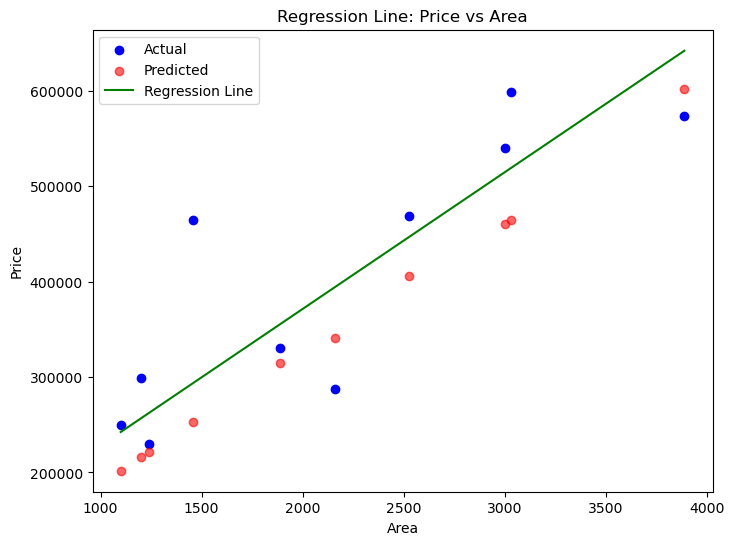

In [124]:
# Use Area feature from test set and predicted prices
X_feature = X_test['area']
y_actual = y_test
y_predicted = y_pred

plt.figure(figsize=(8,6))
plt.scatter(X_feature, y_actual, color='blue', label='Actual')
plt.scatter(X_feature, y_predicted, color='red', label='Predicted', alpha=0.6)

# Plot regression line (fit on train data)
# We'll use the model's coef_ and intercept_ for 'Area'
coef_area = model.coef_[X_test.columns.get_loc('area')]
intercept = model.intercept_

# Create line points
x_line = np.linspace(X_feature.min(), X_feature.max(), 100)
y_line = intercept + coef_area * x_line

plt.plot(x_line, y_line, color='green', label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Regression Line: Price vs Area')
plt.legend()
plt.savefig('Plotting Regression Line (Price vs Area).png')
plt.show()

# 2. Plot Residuals

# Residuals = Actual - Predicted

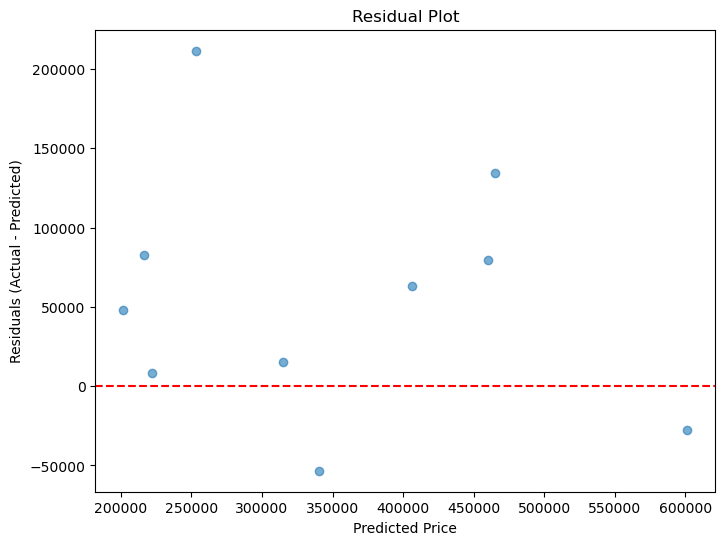

In [122]:
residuals = y_actual - y_predicted

plt.figure(figsize=(8,6))
plt.scatter(y_predicted, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.savefig('residual_plot.png')
plt.show()


 # 8.Print metrics like MAE, MSE, and R² score.

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Assuming y_test and y_pred are defined

# MAE

In [153]:
mae = mean_absolute_error(y_test, y_pred)

In [155]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 72334.75


#  MSE

In [158]:
mse = mean_squared_error(y_test, y_pred)

In [160]:
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 8610424544.78


 # R² score

In [146]:
r2 = r2_score(y_test, y_pred)

In [148]:
print(f"R² Score: {r2:.2f}")

R² Score: 0.51


 # 9.Save trained model using joblib.

In [166]:
# importing the liabrary
import joblib

import joblib is used so you can save your trained machine learning model to a file and load it back later without retraining.

In [169]:
# Save the trained model to a file

In [171]:
joblib.dump(model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

In [179]:
# Later, we can load it back like this

In [181]:
loaded_model = joblib.load('linear_regression_model.joblib')

In [183]:
loaded_model

LinearRegression()

 # 10.Build a function that takes new input and predicts price

# 1.Takes new input data (like features of a house)
# 2.Uses your trained model to predict the price

def predict_price(input_data, model):
    """
    Predict house price given input features and a trained model.

    Parameters:
    - input_data: dict or DataFrame with feature names and values
    - model: trained regression model

    Returns:
    - predicted price (float)
    """
    import pandas as pd

    # Convert input data to DataFrame if it's a dict
    if isinstance(input_data, dict):
        input_df = pd.DataFrame([input_data])
    else:
        input_df = input_data

    # Predict price
    predicted_price = model.predict(input_df)

    return predicted_price[0]  # return scalar value


# How to use it

In [197]:
# Get required feature names
print(X_train.columns.tolist())

['area', 'rooms']


In [199]:
# Example new house data
new_house = {
    'area': 1500,
    'rooms': 3,
    # add all other features your model expects...
}

price = predict_price(new_house, model)
print(f"Predicted Price: {price:.2f}")


Predicted Price: 259053.73


Notes:

Make sure all features your model was trained on are present in input_data.
Features should be in the same format/order as training data.
If you encoded categorical variables, you need to prepare input data the same way.